# Создание признакового пространства

#### 1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно:
- Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
- Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
- Исключим стоп-слова с помощью stop_words='english'. 
- Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import warnings

warnings.filterwarnings("ignore")

In [2]:
combine_df = pd.read_pickle('preproces_combine_df.pkl')
combine_df.head()

,id,label,tweet,clean_tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,@user when a father is dysfunctional and is s...,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,#model i love u take with u all the time in ...,model love you take with you all the time in ur,"[model, love, you, take, with, you, all, the, ...","[model, love, take, time, ur]","[model, love, take, time, ur]","[model, love, take, time, ur]"
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"


In [3]:
count_vectorizer_stemmed = CountVectorizer(max_df=0.9,
                                           max_features=1000,
                                           stop_words='english')
count_vectorizer_lemmatized = CountVectorizer(max_df=0.9,
                                              max_features=1000,
                                              stop_words='english')

In [4]:
tweet_stemmed = np.array(
    combine_df['tweet_stemmed'].apply(lambda x: ' '.join(x)))
tweet_lemmatized = np.array(
    combine_df['tweet_lemmatized'].apply(lambda x: ' '.join(x)))

In [5]:
# Создаем the Bag-of-Words модель
bag_of_words_stemmed = count_vectorizer_stemmed.fit_transform(tweet_stemmed)

# Отобразим Bag-of-Words модель как DataFrame
feature_names_stemmed = count_vectorizer_stemmed.get_feature_names()
pd.DataFrame(bag_of_words_stemmed.toarray(),
             columns=feature_names_stemmed).head(10)

,abl,absolut,accept,account,act,action,activ,actor,actual,ad,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Создаем the Bag-of-Words модель
bag_of_words_lemmatized = count_vectorizer_lemmatized.fit_transform(tweet_lemmatized)

# Отобразим Bag-of-Words модель как DataFrame
feature_names_lemmatized = count_vectorizer_lemmatized.get_feature_names()
pd.DataFrame(bag_of_words_lemmatized.toarray(),
             columns=feature_names_lemmatized).head(10)

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,yes,yesterday,yo,yoga,york,young,youth,youtube,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
- Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
- Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
- Исключим стоп-слова с помощью stop_words='english'.
- Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().

In [7]:
tfidf_vectorizer_stemmed = TfidfVectorizer(max_df=0.9,
                                           max_features=1000,
                                           stop_words='english')
tfidf_vectorizer_lemmatized = TfidfVectorizer(max_df=0.9,
                                              max_features=1000,
                                              stop_words='english')

In [8]:
# Создаем the Bag-of-Words модель
bag_tfidf_stemmed = tfidf_vectorizer_stemmed.fit_transform(tweet_stemmed)

# Отобразим Bag-of-Words модель как DataFrame
feature_names_stemmed = tfidf_vectorizer_stemmed.get_feature_names()
pd.DataFrame(bag_tfidf_stemmed.toarray(),
             columns=feature_names_stemmed).head(10)

,abl,absolut,accept,account,act,action,activ,actor,actual,ad,...,yeah,year,yesterday,yo,yoga,york,young,youtub,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.403633,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Создаем the Bag-of-Words модель
bag_tfidf_lemmatized = tfidf_vectorizer_lemmatized.fit_transform(tweet_lemmatized)

# Отобразим Bag-of-Words модель как DataFrame
feature_names_lemmatized = tfidf_vectorizer_lemmatized.get_feature_names()
pd.DataFrame(bag_tfidf_lemmatized.toarray(),
             columns=feature_names_lemmatized).head(10)

,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,yes,yesterday,yo,yoga,york,young,youth,youtube,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы

In [10]:
# Загружаем данные
data = open('corpus').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


In [11]:
from sklearn import model_selection, preprocessing, linear_model
from sklearn.metrics import accuracy_score

In [12]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(trainDF['text'], trainDF['label'])

In [13]:
classifier = linear_model.LogisticRegression()

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [14]:
models = []

models.append(('CountVectorizer',
               CountVectorizer(analyzer='word',
                               token_pattern=r'\w{1,}',
                               stop_words='english')))
models.append(('TfidfVectorizer',
               TfidfVectorizer(analyzer='word',
                               token_pattern=r'\w{1,}',
                               stop_words='english')))

In [15]:
results = []

for name, model in models:

    model.fit(trainDF['text'])
    
    X_train_count = model.transform(X_train)
    X_test_count = model.transform(X_test)

    classifier.fit(X_train_count, y_train)
    predictions = classifier.predict(X_test_count)

    f1_score = accuracy_score(y_test, predictions)

    results.append((name, f1_score))

stock_model = pd.DataFrame(results, columns=['model', 'f1_score'])
stock_model.sort_values('f1_score', ascending=False)

,model,f1_score
1,TfidfVectorizer,0.8516
0,CountVectorizer,0.8352


#### Подбор парметров

In [16]:
max_df = [1, 0.9, 0.5, 0.1]
max_features = [3000, 1500, 1000, 350]

In [17]:
models = []

for i in max_df:
    for j in max_features:
        models.append((f'CountVectorizer_max_df{i}_max_feat{j}',
                       CountVectorizer(analyzer='word',
                                       token_pattern=r'\w{1,}',
                                       max_df=i,
                                       max_features=j,
                                       stop_words='english')))
        models.append((f'TfidfVectorizer_max_df{i}_max_feat{j}',
                       TfidfVectorizer(analyzer='word',
                                       token_pattern=r'\w{1,}',
                                       max_df=i,
                                       max_features=j,
                                       stop_words='english')))

In [18]:
results = []

for name, model in models:

    model.fit(trainDF['text'])
    
    X_train_count = model.transform(X_train)
    X_test_count = model.transform(X_test)

    classifier.fit(X_train_count, y_train)
    predictions = classifier.predict(X_test_count)

    f1_score = accuracy_score(y_test, predictions)

    results.append((name, f1_score))

different_models = pd.DataFrame(results, columns=['model', 'f1_score'])
different_models.sort_values('f1_score', ascending=False)

,model,f1_score
17,TfidfVectorizer_max_df0.5_max_feat3000,0.8504
9,TfidfVectorizer_max_df0.9_max_feat3000,0.8504
11,TfidfVectorizer_max_df0.9_max_feat1500,0.8392
19,TfidfVectorizer_max_df0.5_max_feat1500,0.8392
25,TfidfVectorizer_max_df0.1_max_feat3000,0.8332
13,TfidfVectorizer_max_df0.9_max_feat1000,0.8328
21,TfidfVectorizer_max_df0.5_max_feat1000,0.8328
8,CountVectorizer_max_df0.9_max_feat3000,0.8248
16,CountVectorizer_max_df0.5_max_feat3000,0.8248
27,TfidfVectorizer_max_df0.1_max_feat1500,0.8232


In [20]:
final_result = pd.concat([different_models, stock_model], axis=0)

In [21]:
import matplotlib.pyplot as plt

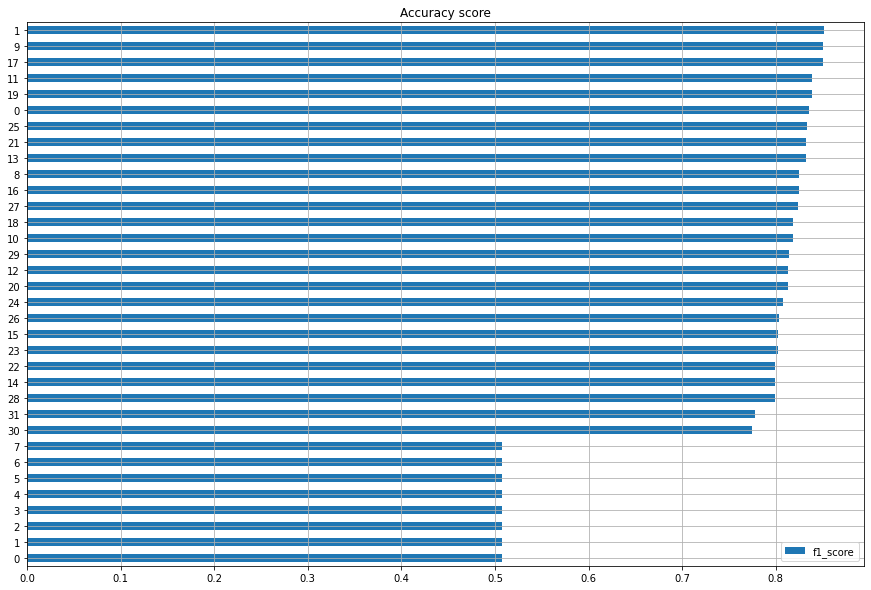

,model,f1_score
1,TfidfVectorizer,0.8516
9,TfidfVectorizer_max_df0.9_max_feat3000,0.8504
17,TfidfVectorizer_max_df0.5_max_feat3000,0.8504
19,TfidfVectorizer_max_df0.5_max_feat1500,0.8392
11,TfidfVectorizer_max_df0.9_max_feat1500,0.8392
0,CountVectorizer,0.8352
25,TfidfVectorizer_max_df0.1_max_feat3000,0.8332
13,TfidfVectorizer_max_df0.9_max_feat1000,0.8328
21,TfidfVectorizer_max_df0.5_max_feat1000,0.8328
8,CountVectorizer_max_df0.9_max_feat3000,0.8248


In [22]:
final_result.sort_values('f1_score',
                         ascending=True).plot(kind='barh',
                                              grid=True,
                                              title='Accuracy score',
                                              figsize=(15, 10))
plt.show()

final_result.sort_values('f1_score', ascending=False)

__Выводы:__ 
- Лучший результат показал TfidfVectorizer - 0.8516 в стоковом состоянии, CountVectorizer показал чуть хуже результат - 0.8352 и поэтому занял 6 строчку в нашем рейтинге
- Посмотрели как параметры повлияли на скор, но изначальный скор так и непревзошли (ограничение количества слов хорошо влияют на скор)
- 2-3 место занял также TfidfVectorizer, но с измененными параметрами: max_df=0.9 or 0.5 и max_features=3000

In [23]:
from sklearn.decomposition import TruncatedSVD

In [39]:
models = []

models.append(('TfidfVectorizer',
               TfidfVectorizer(analyzer='word',
                               token_pattern=r'\w{1,}',
                               stop_words='english')))

In [42]:
results = []

for name, model in models:

    for n in [100, 350, 500, 1000]:
        
        model.fit(trainDF['text'])

        svd = TruncatedSVD(n_components=n, random_state=42, algorithm='arpack')

        X_train_count = model.transform(X_train)
        X_test_count = model.transform(X_test)

        X_train_count_svd = svd.fit_transform(X_train_count)
        X_test_count_svd = svd.transform(X_test_count)

        classifier.fit(X_train_count_svd, y_train)
        predictions = classifier.predict(X_test_count_svd)

        f1_score = accuracy_score(y_test, predictions)

        results.append((str(name) + '_' + str(n), f1_score))

pca_model = pd.DataFrame(results, columns=['model', 'f1_score'])
pca_model.sort_values('f1_score', ascending=False)

,model,f1_score
3,TfidfVectorizer_1000,0.8512
2,TfidfVectorizer_500,0.8432
1,TfidfVectorizer_350,0.8352
0,TfidfVectorizer_100,0.8216


__Вывод:__
- TfidfVectorizer_1000 имеет скор - 0.8512, почти такой же как и лидер: TfidfVectorizer в стоковом состоянии - 0.8516